In [1]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

# 0. user-defined variables

In [2]:
data_file = '/home/adrian/projects/HUVECs/data/HUVEC_AllMeasurements_Summary_09.11.2021.xlsx'

# 1. read data

In [3]:
df = pandas.read_excel(data_file, header=1)
df = df.iloc[1: , :]
df.head()

,Sample ID,Experiment,Treatment,Timepoint (h),Cell numbers,Na+,Cl-,Glucose,Lactate,Glutamine,...,Aspartic ac,MS Glutamin,MS Glutamic ac,Ornithine,Lysine,Citrulline,Glycin NL,XLeu/Ile/Hopro,Methylhistidin,Phenylalanine
1,1,2,0.0,0.0,480000,121,111,5800,300,2061.070339,...,100.16,1422.455,1577.685,31.58,1509.19,3.705,633.275,842.7,2.165,156.8
2,2,2,0.5,0.0,480000,120,110,5900,400,13548.102359,...,114.53,1576.49,1738.505,34.935,1673.355,4.86,737.03,929.685,2.04,171.59
3,3,2,5.0,0.0,480000,121,111,5900,300,1379.54308,...,104.79,1597.895,1618.63,31.085,1770.46,4.49,746.875,926.1,2.375,166.795
4,4,2,50.0,0.0,480000,120,112,6200,700,1459.603473,...,103.17,1624.73,1547.505,29.82,1858.57,4.695,691.83,871.235,1.72,160.115
5,5,2,0.0,4.0,560000,122,114,4700,2900,3979.601392,...,103.075,1425.89,1535.835,34.91,1628.795,4.05,641.75,813.275,1.86,146.15


# 2. work with glucose and lactate

In [4]:
experiments = [2, 3, 7]
treatments = [0, 0.5, 5]
metabolites = ['Glucose', 'Lactate']

Glucose 0 2
start [4700 4600 4900] 4700.0
end [700 900 1000] 900.0
cells [830000 830000 830000] 830000.0
Glucose 0 3
start [4800 4500 5100] 4800.0
end [1700 1200 1100] 1200.0
cells [730000 730000 730000] 730000.0
Glucose 0 7
start [4500 4300 4600] 4500.0
end [1600 1600 1600] 1600.0
cells [550000 550000 550000] 550000.0
[-5.493975903614458, -5.917808219178082, -6.327272727272727]

Glucose 0.5 2
start [4900 4800 4600] 4800.0
end [600 700 1200] 700.0
cells [585000 585000 585000] 585000.0
Glucose 0.5 3
start [4800 4600 4700] 4700.0
end [1300 1300 1300] 1300.0
cells [630000 630000 630000] 630000.0
Glucose 0.5 7
start [4000 4200 4900] 4200.0
end [1600 1900 1600] 1600.0
cells [515000 515000 515000] 515000.0
[-8.41025641025641, -6.476190476190476, -6.058252427184466]

Glucose 5 2
start [5100 5100 4800] 5100.0
end [600 900 600] 600.0
cells [525000 525000 525000] 525000.0
Glucose 5 3
Glucose 5 7
start [4800 4500 5000] 4800.0
end [2000 1700 1700] 1700.0
cells [457000 457000 457000] 457000.0
[-10.

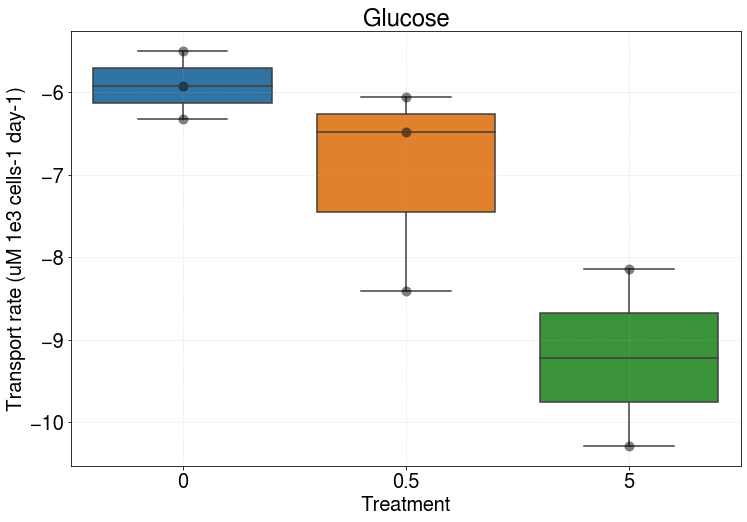

Lactate 0 2
start [2900 2600 3000] 2900.0
end [10200 9900 9800] 9900.0
cells [830000 830000 830000] 830000.0
Lactate 0 3
start [2600 2700 3000] 2700.0
end [9300 9600 9600] 9600.0
cells [730000 730000 730000] 730000.0
Lactate 0 7
start [1700 1700 1600] 1700.0
end [6300 6600 6600] 6600.0
cells [550000 550000 550000] 550000.0
[10.120481927710843, 11.342465753424657, 10.69090909090909]

Lactate 0.5 2
start [2800 2900 2600] 2800.0
end [10500 9100 9700] 9700.0
cells [585000 585000 585000] 585000.0
Lactate 0.5 3
start [2800 2800 2800] 2800.0
end [9600 9700 9900] 9700.0
cells [630000 630000 630000] 630000.0
Lactate 0.5 7
start [1600 1600 600] 1600.0
end [6600 7900 8400] 7900.0
cells [515000 515000 515000] 515000.0
[14.153846153846155, 13.142857142857142, 14.679611650485436]

Lactate 5 2
start [2400 2300 3000] 2400.0
end [9700 10400 10500] 10400.0
cells [525000 525000 525000] 525000.0
Lactate 5 3
Lactate 5 7
start [2200 1600 1900] 1900.0
end [6500 7200 6800] 6800.0
cells [457000 457000 457000] 

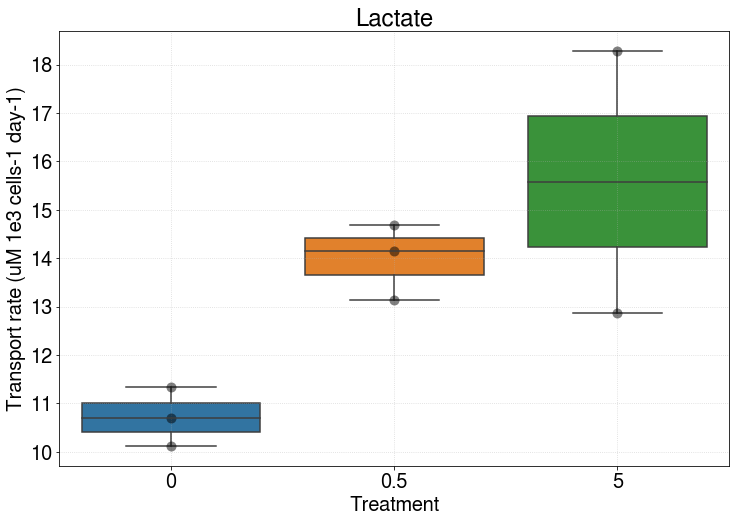

In [5]:
for metabolite in metabolites:
    boxes = []
    for treatment in treatments:
        box = []
        for experiment in experiments:
            
            print(metabolite, treatment, experiment)
            
            # amounts
            sub_exp = df[df['Experiment'] == experiment]
            sub_exp_treatment = sub_exp[sub_exp['Treatment'] == treatment]
            end = sub_exp_treatment[sub_exp_treatment['Timepoint (h)'] == 24]
            start = sub_exp_treatment[sub_exp_treatment['Timepoint (h)'] == 4]
            
            concentration_start = start[metabolite].values
            concentration_end = end[metabolite].values
            cells = end['Cell numbers'].values
            
            # concentration begining
            if concentration_start[0] != '-':
                
                cell_factor = numpy.median(cells)/1e3
                difference = numpy.median(concentration_end) - numpy.median(concentration_start)
                plotting_value = difference/cell_factor * (24/20)
                box.append(plotting_value)
                
                print('start', concentration_start, numpy.median(concentration_start))
                print('end', concentration_end, numpy.median(concentration_end))
                print('cells', cells, numpy.median(cells))
            
        # add box to boxes
        print(box)
        print()
        boxes.append(box)
        
    #
    # statistical test
    #
    print('stats')
    print(boxes)
    stat, pvalue = scipy.stats.mannwhitneyu(boxes[0], boxes[1])
    print('statistics AB', stat, pvalue)
    stat, pvalue = scipy.stats.mannwhitneyu(boxes[0], boxes[2])
    print('statistics AC', stat, pvalue)
     
    #    
    # plot figure
    #
    #matplotlib.pyplot.boxplot(boxes, showcaps=False, medianprops=dict(linewidth=2, color='black'), boxprops=dict(linewidth=2, color='gray'), whiskerprops=dict(linewidth=2, color='gray'))
    seaborn.boxplot(data=boxes)
    
    # scatter
    for i in range(len(boxes)):
        for element in boxes[i]:
            matplotlib.pyplot.plot(i, element, 'o', color='black', alpha=0.5, ms=10, mew=0)
    
    # close figure
    matplotlib.pyplot.title(metabolite)
    matplotlib.pyplot.xlabel('Treatment')
    matplotlib.pyplot.ylabel('Transport rate (uM 1e3 cells-1 day-1)')
    matplotlib.pyplot.xticks([0, 1, 2], ['0', '0.5', '5'])
    matplotlib.pyplot.grid(ls=':', alpha=0.5)
    matplotlib.pyplot.show()            

# 3. work with pyruvate

In [6]:
experiments = [6, 5]
treatments = [0, 0.5, 5]
metabolites = ['Pyruvate']

Pyruvate 0 6
start [683.307924820761 724.264654426188 734.856252689623] 724.264654426188
end [259.771924700521 239.051178861704 235.839768525808] 239.051178861704
cells [225000 225000 225000] 225000.0
Pyruvate 0 5
start [762.034286516834 656.481538478053 617.803567193357] 656.481538478053
end [202.262409395077 170.128265428101 212.736745398509] 202.262409395077
cells [650000 650000 650000] 650000.0
[-2.5878052030105816, -0.8385583921531865]

Pyruvate 0.5 6
start [674.496823934728 706.756601095068 658.607979625754] 674.496823934728
end [227.95279344929 232.997159596766 270.90237277284] 232.997159596766
cells [600000 600000 600000] 600000.0
Pyruvate 0.5 5
start [661.34329223649 616.79157587085 659.347757530966] 659.347757530966
end [183.82211906667 181.962087143516 205.809741685095] 183.82211906667
cells [750000 750000 750000] 750000.0
[-0.882999328675924, -0.7608410215428736]

Pyruvate 5 6
start [567.355866548664 520.241054712558 561.328402099757] 561.328402099757
end [157.32786159296 1

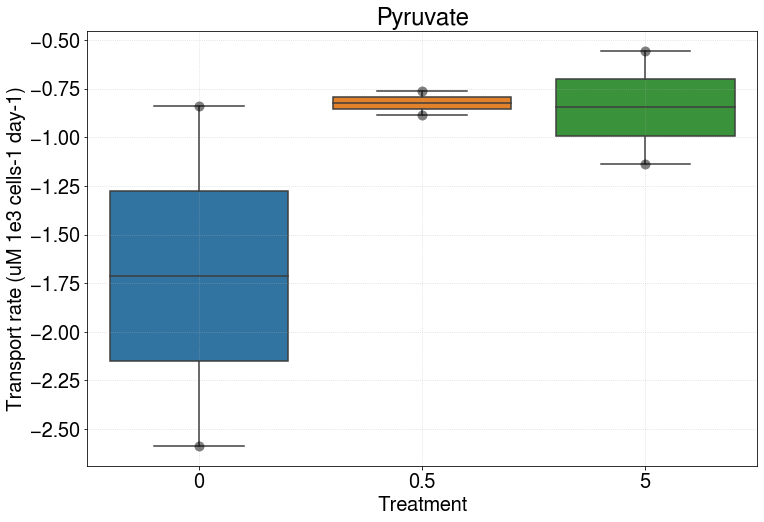

In [7]:
for metabolite in metabolites:
    boxes = []
    for treatment in treatments:
        box = []
        for experiment in experiments:
            
            print(metabolite, treatment, experiment)
            
            # amounts
            sub_exp = df[df['Experiment'] == experiment]
            sub_exp_treatment = sub_exp[sub_exp['Treatment'] == treatment]
            end = sub_exp_treatment[sub_exp_treatment['Timepoint (h)'] == 24]
            start = sub_exp_treatment[sub_exp_treatment['Timepoint (h)'] == 4]
            
            concentration_start = start[metabolite].values
            concentration_end = end[metabolite].values
            cells = end['Cell numbers'].values
            
            # concentration begining
            if concentration_start[0] != '-':
                
                cell_factor = numpy.median(cells)/1e3
                difference = numpy.median(concentration_end) - numpy.median(concentration_start)
                plotting_value = difference/cell_factor * (24/20)
                box.append(plotting_value)
                
                print('start', concentration_start, numpy.median(concentration_start))
                print('end', concentration_end, numpy.median(concentration_end))
                print('cells', cells, numpy.median(cells))
            
        # add box to boxes
        print(box)
        print()
        boxes.append(box)
        
    #
    # statistical test
    #
    print('stats')
    print(boxes)
    stat, pvalue = scipy.stats.mannwhitneyu(boxes[0], boxes[1])
    print('statistics AB', stat, pvalue)
    stat, pvalue = scipy.stats.mannwhitneyu(boxes[0], boxes[2])
    print('statistics AC', stat, pvalue)
     
    #    
    # plot figure
    #
    #matplotlib.pyplot.boxplot(boxes, showcaps=False, medianprops=dict(linewidth=2, color='black'), boxprops=dict(linewidth=2, color='gray'), whiskerprops=dict(linewidth=2, color='gray'))
    seaborn.boxplot(data=boxes)
    
    # scatter
    for i in range(len(boxes)):
        for element in boxes[i]:
            matplotlib.pyplot.plot(i, element, 'o', color='black', alpha=0.5, ms=10, mew=0)
    
    # close figure
    matplotlib.pyplot.title(metabolite)
    matplotlib.pyplot.xlabel('Treatment')
    matplotlib.pyplot.ylabel('Transport rate (uM 1e3 cells-1 day-1)')
    matplotlib.pyplot.xticks([0, 1, 2], ['0', '0.5', '5'])
    matplotlib.pyplot.grid(ls=':', alpha=0.5)
    matplotlib.pyplot.show()            